# ADVANCED CUSTOMER SEGMENTATION

In this project, we will use an advanced library (Kmodes) developed by the Massachusetts Institute of Technology (MIT).
Since our data is complex, we cannot use K-Means here.

In [1]:
import numpy as np 
import pandas as pd


In [2]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# The kmodes library is not included in the standard distribution, you may need to install it.
# It is an advanced library developed by the Massachusetts Institute of Technology (MIT).
# Details are available at https://anaconda.org/conda-forge/kmodes
# You can install it on Anaconda with the command # conda install -c conda-forge kmodes.
from kmodes.kprototypes import KPrototypes  




In [3]:
# You can download dataset from: https://www.kaggle.com/khalidnasereddin/retail-dataset-analysis?select=segmentation-data.csv#
df = pd.read_csv("segmentation-data.csv")
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# Let's look the dataset if we have any null?
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

We have no null data, ok..

In [5]:
# Income ve Age Data Normalization
# Before Scaling/Normalization we keep our normal values in temp variables..
df_temp = df[['ID','Age', 'Income']]
df_temp


,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


### Scaling process..

In [6]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])


In [7]:
# Since ID is not used in analysis, Drop ID before analysis..
df = df.drop(['ID'], axis=1)

In [8]:
# Convert Age and Income into float..
mark_array= df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)


In [9]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [10]:
# We are building our model...

kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])


print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 842, ncost: 169.05136372821568
Run: 1, iteration: 2/20, moves: 220, ncost: 166.81991027669912
Run: 1, iteration: 3/20, moves: 144, ncost: 163.09445248280818
Run: 1, iteration: 4/20, moves: 37, ncost: 163.02695080245678
Run: 1, iteration: 5/20, moves: 27, ncost: 162.8653628565751
Run: 1, iteration: 6/20, moves: 43, ncost: 162.6145834052271
Run: 1, iteration: 7/20, moves: 46, ncost: 162.47580720385307
Run: 1, iteration: 8/20, moves: 14, ncost: 162.4678100217063
Run: 1, iteration: 9/20, moves: 3, ncost: 162.46713168076428
Run: 1, iteration: 10/20, moves: 3, ncost: 162.46655422753318
Run: 1, iteration: 11/20, moves: 2, ncost: 162.4643967365678
Run: 1, iteration: 12/20, moves: 5, ncost: 162.46298050343404
Run: 1, iteration: 13/20, moves: 2, ncost: 162.46285370575853
Run: 1, iteration: 14/20, moves: 1, ncost: 162.46262879774605
Run: 1, iteration: 15/20, moves: 0, ncost: 162.4626287

10

In [11]:
cluster_col=[]
for c in clusters:
    cluster_col.append(c)

df['cluster']=cluster_col

# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp


In [14]:
# After clustering, you can now easily get lists of your customers for each cluster or segment:
df[df['cluster'] == 9].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
10,1,1,25,1,108469,1,0,9,100000011
11,1,1,24,1,127596,1,0,9,100000012
12,1,1,22,1,108687,1,2,9,100000013
24,0,1,26,1,103667,1,2,9,100000025
41,0,1,26,1,130921,1,0,9,100000042
49,1,1,28,1,122831,1,0,9,100000050
60,0,1,27,1,106955,1,2,9,100000061
66,1,1,29,1,111069,1,0,9,100000067
67,0,1,22,1,139780,1,0,9,100000068
69,1,1,25,1,110019,1,2,9,100000070


No handles with labels found to put in legend.


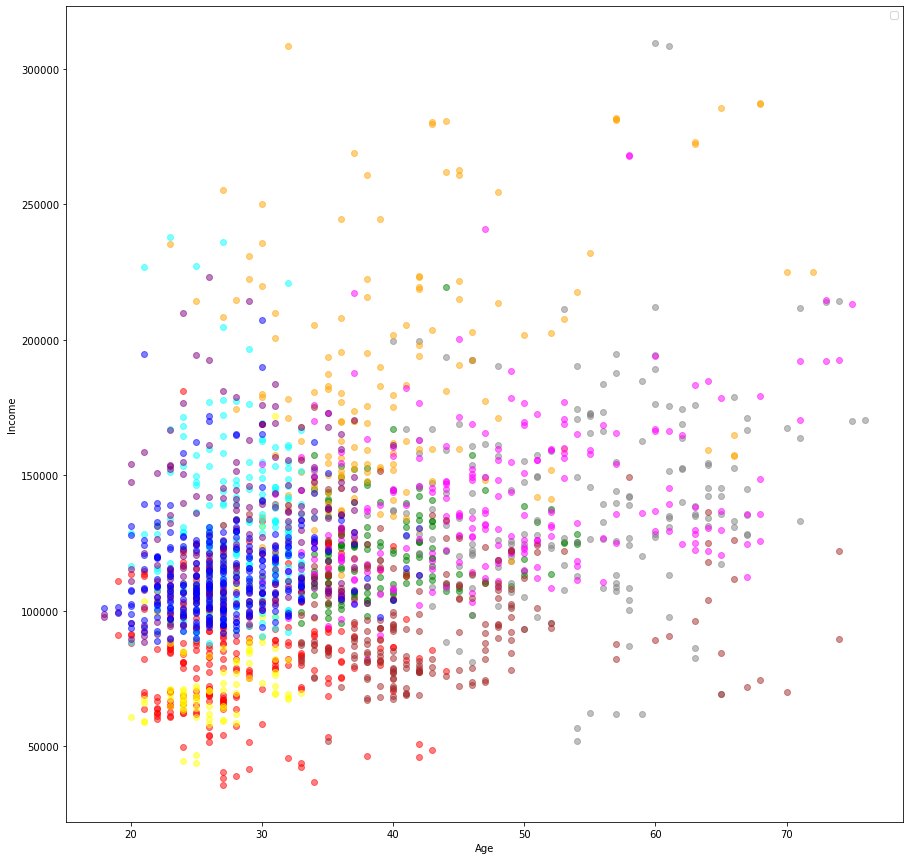

In [15]:
colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age, dftemp['Income'], color=col, alpha=0.5)
    
plt.legend()
plt.show()
    

### Homework

Change cluster size (using values both lower and greater than 10) and run the program again and see if you can get a better segmentation...